In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime



In [ ]:


try:
    # Check for both required files
    if not os.path.exists('/content/historical_stocks.csv'):
        raise FileNotFoundError("File '/content/historical_stocks.csv' not found in current directory")
    if not os.path.exists('/content/historical_stock_prices.csv'):
        raise FileNotFoundError("File '/content/historical_stock_prices.csv' not found in current directory")

    # Load the files
    stocks = pd.read_csv('/content/historical_stocks.csv', encoding='utf-8')
    stock_prices = pd.read_csv('/content/historical_stock_prices.csv', encoding='utf-8')

    # Check if either file is empty
    if stocks.empty:
        raise ValueError("The file '/content/historical_stocks.csv' is empty")
    if stock_prices.empty:
        raise ValueError("The file '/content/historical_stock_prices.csv' is empty")

    print('Successfully loaded both datasets!')

except Exception as e:
    print(f'Error loading data: {str(e)}')
    raise


Successfully loaded both datasets!


In [ ]:
stocks

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS
...,...,...,...,...,...
6455,ZOES,NYSE,"ZOE&#39;S KITCHEN, INC.",CONSUMER SERVICES,RESTAURANTS
6456,ZTS,NYSE,ZOETIS INC.,HEALTH CARE,MAJOR PHARMACEUTICALS
6457,ZTO,NYSE,ZTO EXPRESS (CAYMAN) INC.,TRANSPORTATION,TRUCKING FREIGHT/COURIER SERVICES
6458,ZUO,NYSE,"ZUORA, INC.",TECHNOLOGY,COMPUTER SOFTWARE: PREPACKAGED SOFTWARE


In [ ]:
stock_prices

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.500000,11.580000,8.493155,11.250000,11.680000,4633900.0,2013-05-08
1,AHH,11.660000,11.550000,8.471151,11.500000,11.660000,275800.0,2013-05-09
2,AHH,11.550000,11.600000,8.507822,11.500000,11.600000,277100.0,2013-05-10
3,AHH,11.630000,11.650000,8.544494,11.550000,11.650000,147400.0,2013-05-13
4,AHH,11.600000,11.530000,8.456484,11.500000,11.600000,184100.0,2013-05-14
...,...,...,...,...,...,...,...,...
1167214,MLI,2.531250,2.515625,1.023550,2.515625,2.531250,18400.0,1992-11-27
1167215,STBA,22.250000,21.040001,12.147593,21.000000,22.250000,25900.0,2001-09-20
1167216,CALM,1.343750,1.375000,0.615076,1.343750,1.375000,17200.0,1998-05-21
1167217,PBCT,3.051146,3.015873,0.258097,2.998236,3.051146,602200.0,1996-09-04


In [ ]:
# Task 2 Data Cleaning

stocks=stocks.drop_duplicates()
stocks=stocks.dropna(subset = ['ticker', 'sector'])

stock_prices = stock_prices.drop_duplicates()

In [ ]:

# handle missing values
price_columns = ['open', 'high', 'low', 'close', 'adj_close']
stock_prices[price_columns] = stock_prices[price_columns].ffill()


In [ ]:
# volume
stock_prices ['volume'] = stock_prices.groupby('ticker')['volume'].transform (lambda x: x.fillna (x.median()))

In [ ]:
#convert daytime and set as index
stock_prices['date'] = pd.to_datetime(stock_prices['date'])
stock_prices = stock_prices.sort_values('date')
stock_prices.set_index('date', inplace =True)

In [30]:
stock_prices['decade']=( stock_prices.index.year //10)* 10

In [31]:
decades = sorted(stock_prices['decade'].unique())

In [32]:
decades

[np.float64(1970.0),
 np.float64(1980.0),
 np.float64(1990.0),
 np.float64(2000.0),
 np.float64(2010.0),
 np.float64(nan)]

In [38]:
decades = [int(decade) for decade in sorted(stock_prices['decade'].unique()) if pd.notna(decade)]


In [39]:
decade_dfs={}
for decade in decades:
  decade_dfs [decade] = stock_prices[stock_prices['decade']==decade]

In [40]:
#merge with stock data to include sector information
merged_data =pd.merge(stock_prices, stocks, on ='ticker', how ='left')

merged_data['sector'].isna().sum()

np.int64(149284)

In [41]:
# Analysis by decade
def calculate_decade_stats(decade_df, decade):
    print(f"\nSummary Statistics for {decade}s:")

    # Select relevant columns
    cols = price_columns + ['volume']

    # Describe + additional stats
    stats = decade_df[cols].describe().transpose()
    stats['median'] = decade_df[cols].median()
    stats['IQR'] = decade_df[cols].quantile(0.75) - decade_df[cols].quantile(0.25)

    # Print selected stats
    print(stats[['mean', 'median', 'std', 'IQR', 'min', 'max']])

    return stats





In [42]:
decade_stats={}
for  decade in decades:
  decade_stats[decade]= calculate_decade_stats(decade_dfs[decade], decade)





Summary Statistics for 1970s:
                   mean         median           std           IQR  \
open       6.421893e-01       0.619792  2.873654e-01  3.098958e-01   
high       6.580421e-01       0.630208  2.947139e-01  3.144531e-01   
low        6.335383e-01       0.609375  2.844908e-01  3.177032e-01   
close      6.416699e-01       0.619792  2.871783e-01  3.130592e-01   
adj_close  1.752848e-01       0.065619  2.320696e-01  2.926195e-01   
volume     1.375922e+06  530843.000000  1.860238e+06  2.026275e+06   

                  min           max  
open         0.134550  1.656120e+00  
high         0.144900  1.786012e+00  
low          0.124210  1.656120e+00  
close        0.130906  1.656120e+00  
adj_close    0.000343  1.039424e+00  
volume     100.000000  2.414880e+07  

Summary Statistics for 1980s:
                   mean        median           std            IQR  \
open       3.315762e+01      4.078125  2.312033e+03       7.347222   
high       3.373171e+01      4.148148  2.

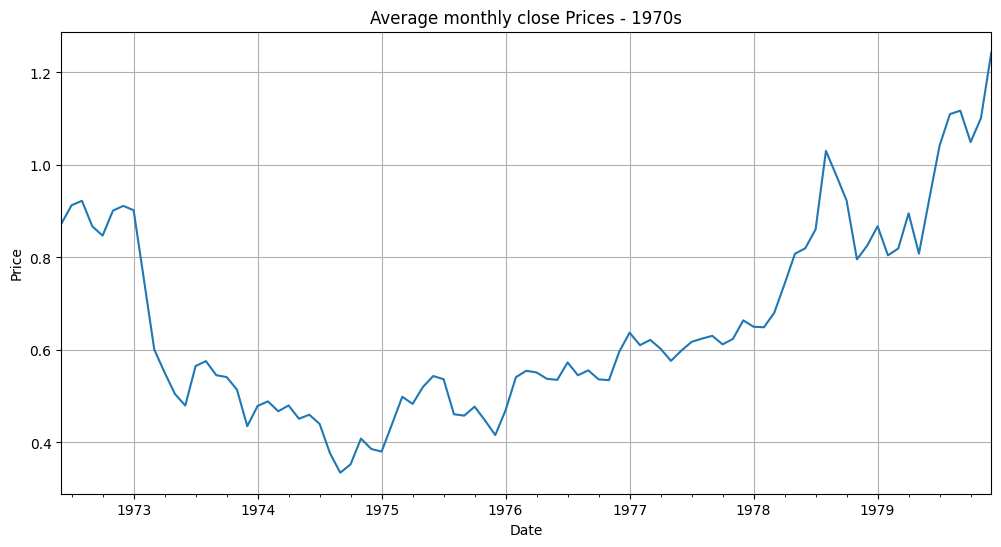

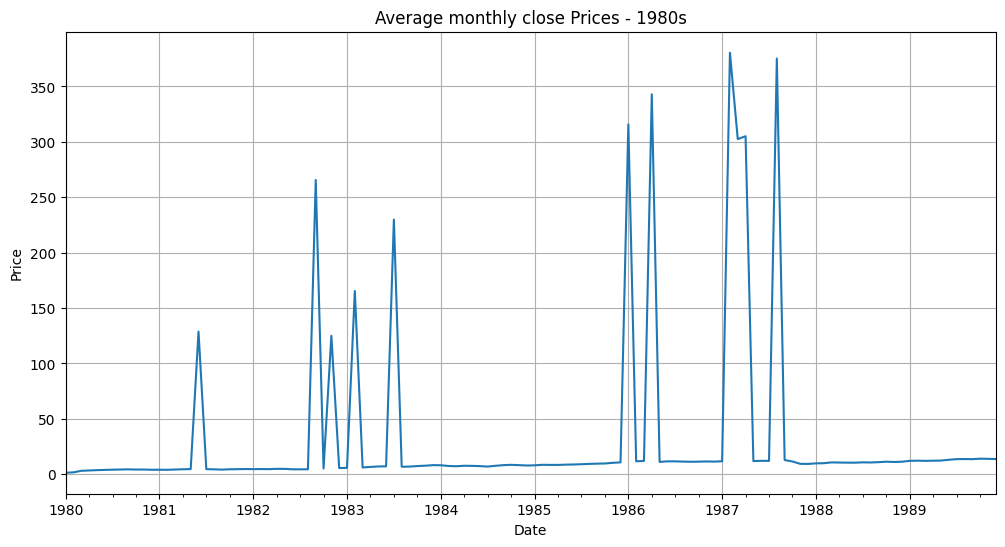

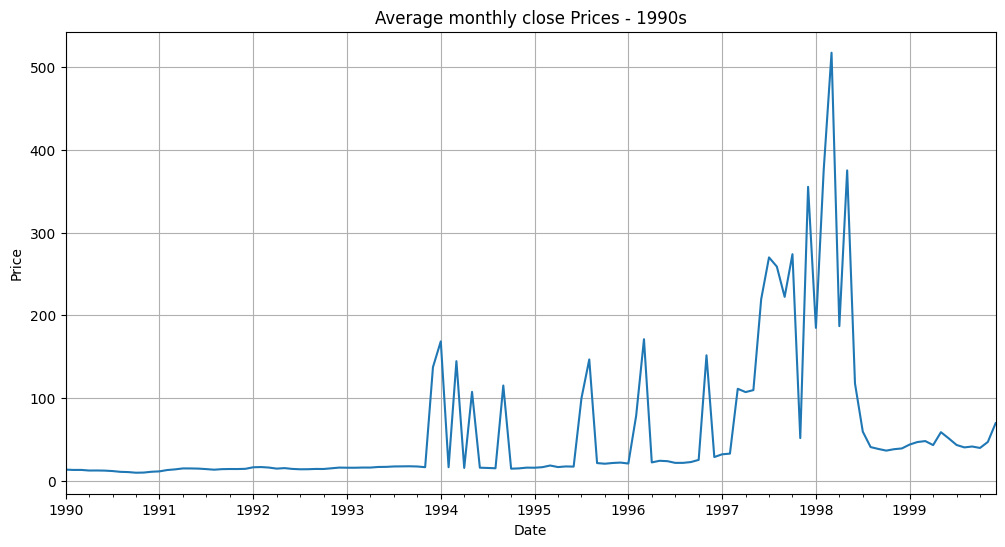

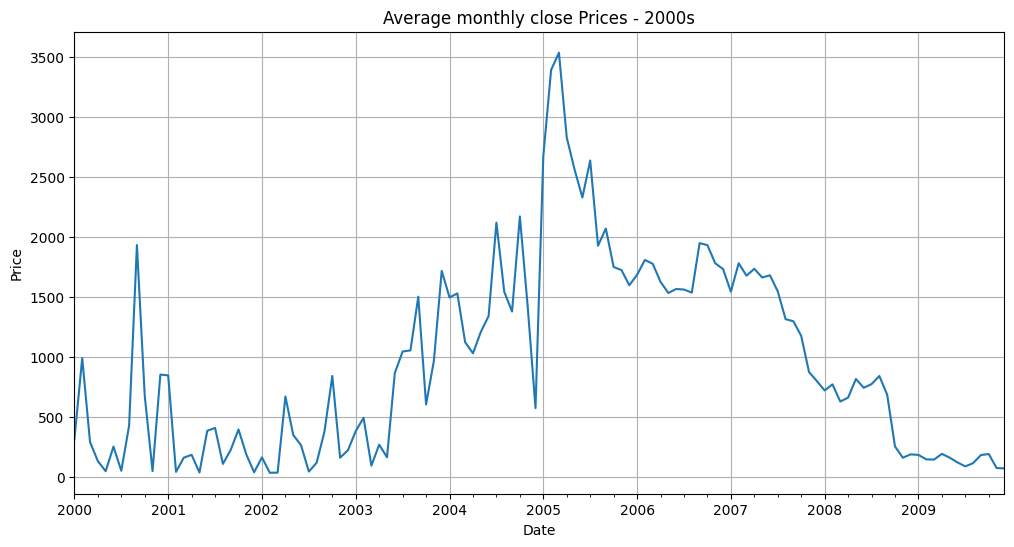

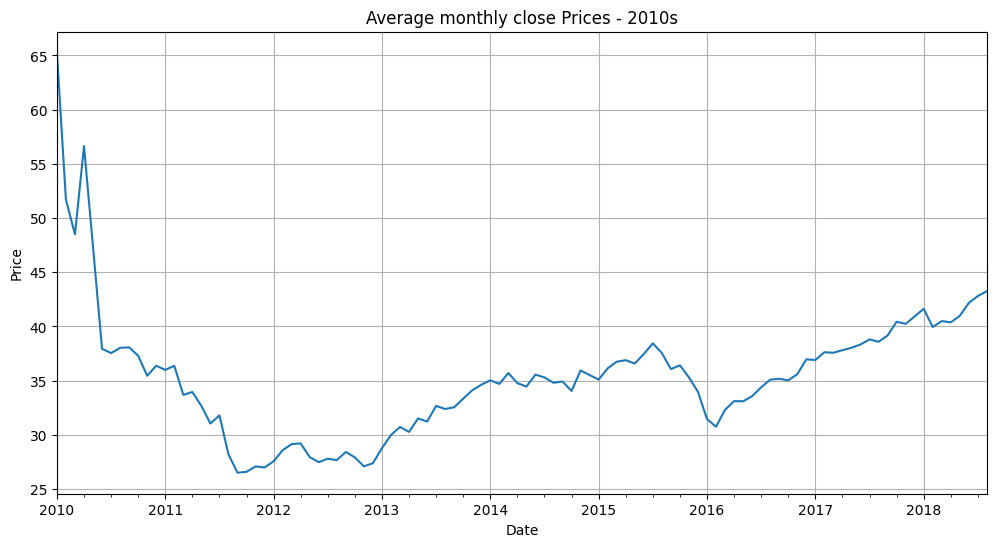

In [43]:
# visualization
for decade in decades:
    decade_df = decade_dfs[decade]

    # Ensure date is datetime and set as index
    if not pd.api.types.is_datetime64_any_dtype(decade_df.index):
        if 'date' in decade_df.columns:
            decade_df['date'] = pd.to_datetime(decade_df['date'])
            decade_df = decade_df.set_index('date')

    plt.figure(figsize=(12, 6))
    monthly_close = decade_df['close'].resample('ME').mean()
    monthly_close.plot(title=f'Average monthly close Prices - {decade}s')

    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.grid(True)
    plt.show()


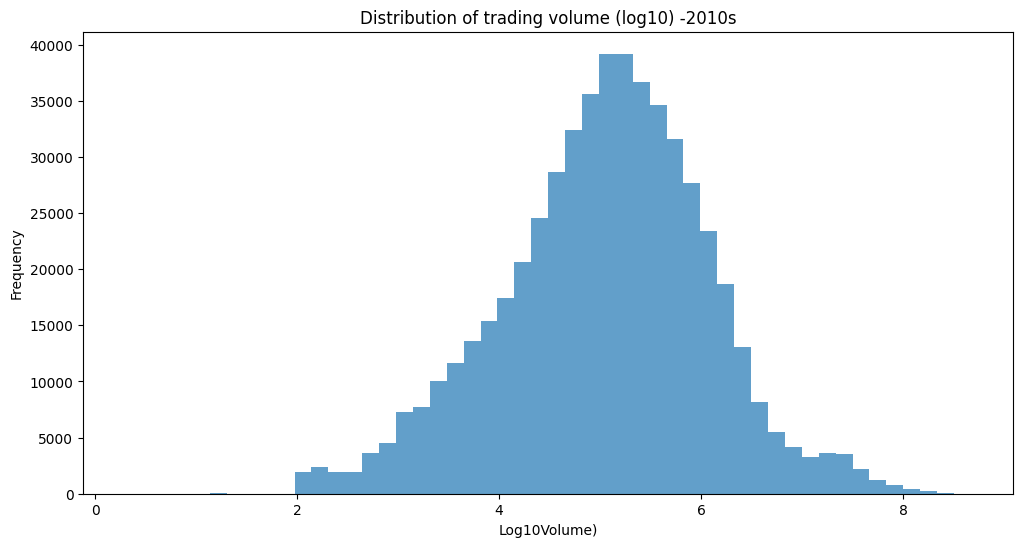

In [44]:
#histogram
plt.figure(figsize=(12,6))
plt.hist(np.log10(decade_df['volume'].dropna()),bins=50,alpha=0.7)
plt.title(f'Distribution of trading volume (log10) -{decade}s')
plt.ylabel('Frequency')
plt.xlabel('Log10Volume)')
plt.show()

# Exploratory Data Analysis Report: Historical Stock Prices by Decade

 **Overview**
I analyzed historical stock prices across several decades: 1970s, 1980s, 1990s, 2000s, and 2010s. The goal was to identify trends, seasonal patterns, and anomalies that could inform hypotheses about factors influencing stock prices.

**Summary of Key Patterns by Decade**


 ***1970s***

General trend:
The average monthly close price declined sharply from 1972 to ~1974, bottomed out, then gradually recovered from ~1975 onward. By the end of the decade (1979), prices climbed to new highs above 1.2.

Volume:
Since the price movement is smooth without extreme spikes, trading activity likely remained relatively stable, with no signs of sudden surges in individual stock influence.

Anomalies:
No extreme outliers or sudden price jumps. The early-70s decline could reflect the 1973 oil crisis and recession.


***1980***

General trend:
The average monthly close price is mostly flat and low (around 0–10) throughout the decade.
There’s no visible sustained growth in prices across the decade — no smooth upward or downward trend.

Volume:
The sharp spikes likely indicate individual high-priced stocks heavily skewed the average rather than broad increases in trading activity.
There is no evidence from this graph alone of steadily growing volume across the decade.

Anomalies:
The decade is characterized by sharp, isolated price spikes (over 100, 200, 300, even near 370), occurring at various points (early 80s, mid-80s, and around 1987).
These spikes do not align with typical patterns of broad market crashes or growth.


***1990s***


General trend:
Prices stayed low and stable (0–20 range) through the early 90s. Starting around 1994, There was a  sudden sharp price spikes — first in the 100–200 range, and later peaking over 500 around 1998. The decade ends with a drop back to low levels.

Volume:
The spikes suggest individual high-priced stocks heavily influenced the average or data anomalies — this likely reflects either:

a small number of very high-priced stocks skewing the average, or

misrecorded data points.
The general market's trading activity likely increased during the tech boom, but these spikes are too extreme to represent broad volume trends.

Anomalies:

Large, isolated spikes from 1994 onward.

Extreme peaks in 1997-1998 could correspond to speculative bubbles or data anomalies.

No smooth tech-boom trend is visible — the spikes dominate the plot.


***2000s***

 General trend: The decade opened with growth but saw volatility — sharp decline during the dot-com crash (2000–2002). In 2003-2004 the prices saw an increase and a sudden sharp decrease in 2005, which start the downward movement that ends the decade


Volume: Trading volume spiked during these periods of market stress.

Anomalies: Large price drops could align with global financial shocks.

*** 2010s***

 General trend: The decade start with decrease in price and gradually starts increasing in 2018. The recovery and sustained growth after the 2008 crash; steady climb throughout the decade.

Volume: Initially high in early years, then stabilizing.








